In [2]:
!pip install tensorflow


In [3]:
import matplotlib.pyplot as mlt

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.13.0'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt


In [7]:
data=pd.read_csv("C:/Users/ashly/OneDrive/Desktop/DataScience Anaconda/DeepLearning/Churn_Modelling.csv")

In [8]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# divide data set in to independant and dependant
x=data.iloc[:,3:13]
y=data.iloc[:,13]

In [10]:
# feature engineering
# get dummies = one hand encoding,drop_first= show 2 cols

geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [11]:
# concate
x=x.drop(['Geography','Gender'],axis=1)

In [24]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [26]:
# concatinating 
x=pd.concat([x,geography,gender],axis=1)

In [27]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

(2000, 8)

In [70]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [71]:
x_train.shape

(8000, 8)

In [72]:
x_test.shape

(2000, 8)

In [73]:
# create ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [74]:

#  initializing ann
classifier=Sequential()

In [75]:
# units= no.of input layer
classifier.add(Dense(units=11,activation='relu'))

In [76]:
# adding  hidden layer one
classifier.add(Dense(units=7,activation='relu'))

In [77]:
classifier.add(Dense(units=6,activation='relu'))

In [78]:

# ouput layer
classifier.add(Dense(1,activation='sigmoid'))

In [79]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [81]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [82]:
model=classifier.fit(x_train,y_train,validation_split=.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.5080 - accuracy: 0.7964 - val_loss: 0.4519 - val_accuracy: 0.8061
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.8162 - val_loss: 0.4087 - val_accuracy: 0.8152
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8266 - val_loss: 0.3927 - val_accuracy: 0.8201
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.8337 - val_loss: 0.3820 - val_accuracy: 0.8421
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3678 - accuracy: 0.8518 - val_loss: 0.3740 - val_accuracy: 0.8493
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3586 - accuracy: 0.8526 - val_loss: 0.3673 - val_accuracy: 0.8474
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8543 - val_loss: 0.3680 - val_accuracy:

In [87]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

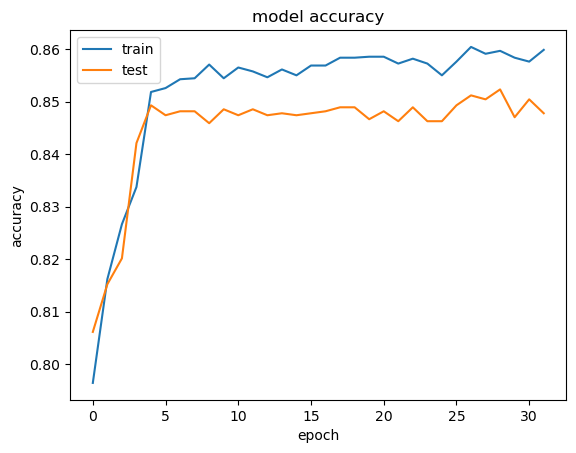

In [88]:
mlt.plot(model.history['accuracy'])
mlt.plot(model.history['val_accuracy'])
mlt.title('model accuracy')
mlt.ylabel("accuracy")
mlt.xlabel("epoch")
mlt.legend(['train','test'],loc='upper left')
mlt.show()

In [89]:
print(y_test.shape)
y_pred=classifier.predict(x_test)
y_pred=(y_pred >= 0.5)
y_pred

(2000,)
63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [90]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1510,   85],
       [ 230,  175]], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8425